# Coursework 3: Classification Analysis

This notebook performs classification analysis on the `training_set.xlsx` dataset to predict students' `Programme` based on three feature sets derived from `Gender`, `Grade`, `Q1-Q5`. Three classifiers (Naive Bayes, Decision Tree, KNN) are applied to distinct feature sets, followed by Voting classifiers with all features. The goal is to evaluate performance and recommend the best model.

## Objectives
- Apply classifiers with hyperparameter tuning on specific feature sets.
- Evaluate Voting classifiers on Feature Set 3.
- Use Accuracy and F1 Score (macro) with 5-fold cross-validation.
- Visualize confusion matrices and save results.
- Recommend the best classifier based on performance.

## Structure
The code is organized into sections:
1. Import libraries.
2. Load data and create output directory.
3. Preprocess data (create three feature sets).
4. Define classifiers and their corresponding feature sets.
5. Perform classification experiments for Naive Bayes, Decision Tree, KNN.
6. Perform voting experiments with all features.
7. Display and save results.

## Import Libraries
This section imports necessary libraries for data processing, classification, evaluation, and visualization.

**Input**: None.

**Output**: Imported libraries.

**Purpose**: Set up the environment for classification tasks.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, Normalizer, MinMaxScaler
from sklearn.model_selection import cross_val_score, StratifiedKFold, GridSearchCV, cross_val_predict
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import os
from evaluate import evaluate_classification

## Load Data and Create Output Directory

This section loads the dataset from `training_set.xlsx` and creates an `output` directory for saving results. The dataset contains features (`Gender, Grade, Q1-Q5`) and a target (`Programme`).

**Input**: training_set.xlsx file.

**Output**: Loaded DataFrame, selected features (`raw_feature`), target (`label`), and `output` directory.

**Purpose**: Prepare the dataset and file structure for classification.

In [2]:
# Create output directory
if not os.path.exists('output'):
    os.makedirs('output')

# Load data
dataframe = pd.read_excel('training_set.xlsx')
print("Column names:", list(dataframe.columns))

# Select features and target
features_selected = ['Gender', 'Grade', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5']
raw_feature = dataframe[features_selected]
label = dataframe['Programme']

Column names: ['Programme', 'Gender', 'Grade', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5']


## Preprocess Data
This section creates three feature sets for classification:
- **Set 1**: `Gender`, `Q2`, `Q4`, scaled with MinMaxScaler.
- **Set 2**: `Gender`, `Grade`, `Q1-Q5`.
- **Set 3**: `Gender`, `Grade`, `Q1-Q5`, scaled with StandardScaler.

**Input**: Raw features DataFrame (`raw_dataframe`).

**Output**: Dictionary `feature_sets` with three scaled NumPy arrays.

**Purpose**: Prepare feature sets for Naive Bayes (Set 1), Decision Tree (Set 2), and KNN (Set 3), with appropriate scaling for classifier compatibility.


In [3]:
# Prepare Feature Sets
# -------------------
# Create and preprocess three feature sets for clustering.

# Initialize scaler
scaler_minmax = MinMaxScaler()
scaler_standard = StandardScaler()

# Feature Set 1: Gender, Q2, Q4
feature_set1 = raw_feature[['Gender', 'Q2', 'Q4']].copy()
feature_set1_scaled = scaler_minmax.fit_transform(feature_set1)
print("Feature Set 1 shape:", feature_set1_scaled.shape)

# Feature Set 2: All features
feature_set2 = raw_feature.copy()
print("Feature Set 2 shape:", feature_set2.shape)

# Feature Set 3: All features with StandardScaler
feature_set3 = raw_feature.copy()
feature_set3_scaled = scaler_standard.fit_transform(feature_set3)
print("Feature Set 3 shape:", feature_set3.shape)



# Store feature sets in dictionary
feature_sets = {
    'Set 1': feature_set1_scaled,
    'Set 2': feature_set2,
    'Set 3': feature_set3_scaled
}

Feature Set 1 shape: (466, 3)
Feature Set 2 shape: (466, 7)
Feature Set 3 shape: (466, 7)


## Define Classifiers and Parameters
This section defines three classifiers, each paired with a specific feature set:
- **Naive Bayes**: Uses Set 1, tunes `var_smoothing`.
- **Decision Tree**: Uses Set 2, tunes `max_depth` and `min_samples_leaf`.
- **KNN**: Uses Set 3, tunes `n_neighbors` and `p`.

**Input**: None.

**Output**: Dictionary of classifiers with models, parameter grids, and feature set assignments.

**Purpose**: Prepare classifiers for experimentation on designated feature sets.


In [4]:
# Define classifiers with parameter grids and feature sets
classifiers = {
    'Naive Bayes (Set 1)': {
        'model': GaussianNB(),
        'params': {'var_smoothing': [1e-9, 1e-8, 1e-6]},
        'feature_set': 'Set 1'
    },
    'Decision Tree (Set 2)': {
        'model': DecisionTreeClassifier(random_state=42),
        'params': {
            'max_depth': [3, 5, 10, None],
            # 'min_samples_leaf': [1, 5, 10]
            'min_samples_leaf': [5]
        },
        'feature_set': 'Set 2'
    },
    'KNN (Set 3)': {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [3, 5, 7, 9, 11, 15],
            # 'p': [1, 2]
            'p': [2]
        },
        'feature_set': 'Set 3'
    }
}

## Perform Classification Experiments and Evaluation
This section applies three classifiers, each using a specific feature set:
- **Naive Bayes**: Uses Set 1.
- **Decision Tree**: Uses Set 2.
- **KNN**: Uses Set 3.

Hyperparameter tuning is performed using GridSearchCV with 5-fold stratified cross-validation. Performance is evaluated using Accuracy and F1 Score (macro). Results include:
- Predicted labels saved to CSV files.
- Confusion matrices visualized as heatmaps.
- Performance metrics collected for comparison.

**Input**: Scaled feature sets (`feature_sets`), target (`label`), classifiers with parameters.

**Output**: Predicted labels (CSV), confusion matrix plots, results list.

**Purpose**: Evaluate each classifier on its designated feature set to compare performance.



Training Naive Bayes (Set 1) on Set 1...

Accuracy for each parameter combination in Naive Bayes (Set 1):
Parameters: {'var_smoothing': 1e-09}
Mean Accuracy: 0.5536 (±0.0744)
Parameters: {'var_smoothing': 1e-08}
Mean Accuracy: 0.5536 (±0.0744)
Parameters: {'var_smoothing': 1e-06}
Mean Accuracy: 0.5536 (±0.0744)
Predicted labels successfully saved to output/Naive_Bayes_(Set_1)_predicted_labels.csv.
Predicted labels saved to output/Naive_Bayes_(Set_1)_predicted_labels.csv


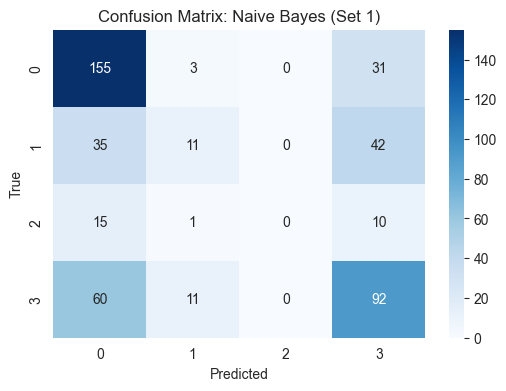


Training Decision Tree (Set 2) on Set 2...

Accuracy for each parameter combination in Decision Tree (Set 2):
Parameters: {'max_depth': 3, 'min_samples_leaf': 5}
Mean Accuracy: 0.5601 (±0.0728)
Parameters: {'max_depth': 5, 'min_samples_leaf': 5}
Mean Accuracy: 0.5471 (±0.1001)
Parameters: {'max_depth': 10, 'min_samples_leaf': 5}
Mean Accuracy: 0.5387 (±0.0633)
Parameters: {'max_depth': None, 'min_samples_leaf': 5}
Mean Accuracy: 0.5387 (±0.0633)
Predicted labels successfully saved to output/Decision_Tree_(Set_2)_predicted_labels.csv.
Predicted labels saved to output/Decision_Tree_(Set_2)_predicted_labels.csv


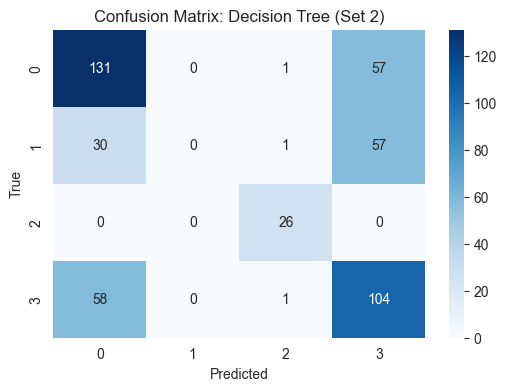


Training KNN (Set 3) on Set 3...

Accuracy for each parameter combination in KNN (Set 3):
Parameters: {'n_neighbors': 3, 'p': 2}
Mean Accuracy: 0.5321 (±0.1180)
Parameters: {'n_neighbors': 5, 'p': 2}
Mean Accuracy: 0.5515 (±0.0960)
Parameters: {'n_neighbors': 7, 'p': 2}
Mean Accuracy: 0.5450 (±0.0853)
Parameters: {'n_neighbors': 9, 'p': 2}
Mean Accuracy: 0.5535 (±0.0645)
Parameters: {'n_neighbors': 11, 'p': 2}
Mean Accuracy: 0.5600 (±0.0656)
Parameters: {'n_neighbors': 15, 'p': 2}
Mean Accuracy: 0.5729 (±0.0664)
Predicted labels successfully saved to output/KNN_(Set_3)_predicted_labels.csv.
Predicted labels saved to output/KNN_(Set_3)_predicted_labels.csv


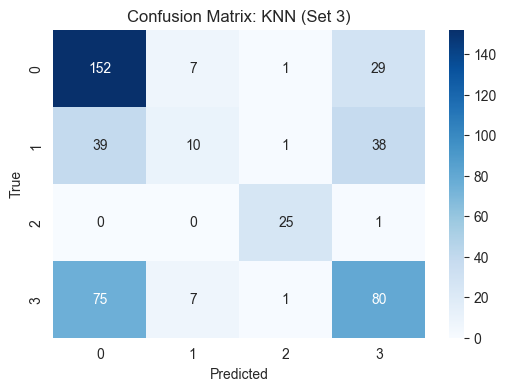

In [5]:
# Perform experiments
results = []
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for clf_name, clf_info in classifiers.items():
    clf = clf_info['model']
    X_subset = feature_sets[clf_info['feature_set']]
    print(f"\nTraining {clf_name} on {clf_info['feature_set']}...")

    # Parameter tuning with GridSearchCV
    param_grid = clf_info['params']
    grid = GridSearchCV(clf, param_grid, cv=skf, scoring='accuracy', n_jobs=-1)
    grid.fit(X_subset, label)

    # Print accuracy for each parameter combination
    print(f"\nAccuracy for each parameter combination in {clf_name}:")
    for params, mean_score, std_score in zip(
        grid.cv_results_['params'],
        grid.cv_results_['mean_test_score'],
        grid.cv_results_['std_test_score']
    ):
        print(f"Parameters: {params}")
        print(f"Mean Accuracy: {mean_score:.4f} (±{std_score * 2:.4f})")

    # Cross-validation scores for the best estimator
    scores = cross_val_score(grid.best_estimator_, X_subset, label, cv=skf, scoring='accuracy')
    f1_scores = cross_val_score(grid.best_estimator_, X_subset, label, cv=skf, scoring='f1_macro')
    y_pred = cross_val_predict(grid.best_estimator_, X_subset, label, cv=skf)
    results.append({
        'Classifier': clf_name,
        'Feature Set': clf_info['feature_set'],
        'Accuracy': grid.best_score_,
        'F1 Score': f1_scores.mean(),
        'Accuracy Std': scores.std() * 2,
        'F1 Std': f1_scores.std() * 2,
        'Best Params': grid.best_params_
    })

    # Save predicted labels
    output_file = f'output/{clf_name.replace(" ", "_")}_predicted_labels.csv'
    evaluate_classification(y_pred.tolist(), filename=output_file)
    print(f"Predicted labels saved to {output_file}")

    # Plot confusion matrix
    conf_mat = confusion_matrix(label, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix: {clf_name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

## Perform Voting Experiments
This section applies Voting classifiers (Soft and Hard) using Feature Set 3 (All features). No hyperparameter tuning is performed, and 5-fold stratified cross-validation is used to evaluate Accuracy and F1 Score (macro). Results include:
- Predicted labels saved to CSV files.
- Confusion matrices visualized as heatmaps.
- Performance metrics added to the results list.

**Input**: Feature Set 3 (`feature_sets['Set 3']`), target (`label`).
**Output**: Predicted labels (CSV), confusion matrix plots, updated results list.
**Purpose**: Evaluate ensemble performance on Feature Set 2 for comparison with main classifiers.



Training Voting (Soft)
Predicted labels successfully saved to output/Voting_(Soft)_predicted_labels.csv.
Predicted labels saved to output/Voting_(Soft)_predicted_labels.csv


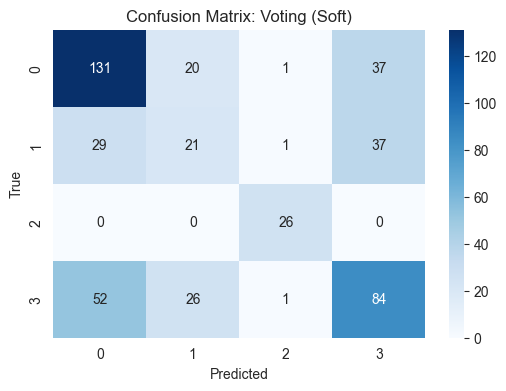


Training Voting (Hard)
Predicted labels successfully saved to output/Voting_(Hard)_predicted_labels.csv.
Predicted labels saved to output/Voting_(Hard)_predicted_labels.csv


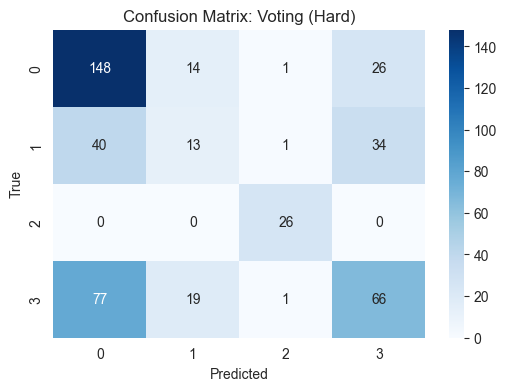

In [6]:
# Define Voting classifiers
voting_classifiers = {
    'Voting (Soft)': VotingClassifier(estimators=[
        ('nb', GaussianNB()),
        ('dt', DecisionTreeClassifier(random_state=42)),
        ('knn', KNeighborsClassifier())
    ], voting='soft'),
    'Voting (Hard)': VotingClassifier(estimators=[
        ('nb', GaussianNB()),
        ('dt', DecisionTreeClassifier(random_state=42)),
        ('knn', KNeighborsClassifier())
    ], voting='hard')
}

# Perform Voting experiments on Feature Set 2
X_subset = feature_sets['Set 3']
for clf_name, clf in voting_classifiers.items():
    print(f"\nTraining {clf_name}")
    scores = cross_val_score(clf, X_subset, label, cv=skf, scoring='accuracy')
    f1_scores = cross_val_score(clf, X_subset, label, cv=skf, scoring='f1_macro')
    y_pred = cross_val_predict(clf, X_subset, label, cv=skf)
    results.append({
        'Classifier': clf_name,
        'Feature Set': 'Set 3',
        'Accuracy': scores.mean(),
        'F1 Score': f1_scores.mean(),
        'Accuracy Std': scores.std() * 2,
        'F1 Std': f1_scores.std() * 2,
        'Best Params': 'N/A'
    })

    # Save predicted labels
    output_file = f'output/{clf_name.replace(" ", "_")}_predicted_labels.csv'
    evaluate_classification(y_pred.tolist(), filename=output_file)
    print(f"Predicted labels saved to {output_file}")

    # Plot confusion matrix
    conf_mat = confusion_matrix(label, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix: {clf_name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    # plt.savefig(f'output/{clf_name.replace(" ", "_")}_confusion_matrix.png')
    plt.show()

## Display and Save Results

This section compiles the classification results into a table, displaying Accuracy, F1 Score, standard deviations, and best parameters. The table is printed to the console and saved to a CSV file. The best classifier is recommended based on the highest Accuracy.

**Input**: Results list from experiments.

**Output**: Printed results table, `classification_performance_table.csv`, recommended model.

**Purpose**: Summarize performance and guide model selection.

In [7]:
# Generate results table
results_df = pd.DataFrame(results)
print("\nClassification Results:")
print(results_df[['Classifier', 'Feature Set', 'Accuracy', 'F1 Score', 'Accuracy Std', 'F1 Std', 'Best Params']])
results_df.to_csv('output/classification_performance_table.csv', index=False)

# Recommendation
best_result = results_df.loc[results_df['Accuracy'].idxmax()]
print(f"\nRecommended Model: {best_result['Classifier']}")
print(f"Feature Set: {best_result['Feature Set']}")
print(f"Reason: Achieves highest accuracy ({best_result['Accuracy']:.2f} ± {best_result['Accuracy Std']:.2f}) "
      f"and F1 score ({best_result['F1 Score']:.2f} ± {best_result['F1 Std']:.2f}) with parameters {best_result['Best Params']}.")


Classification Results:
              Classifier Feature Set  Accuracy  F1 Score  Accuracy Std  \
0    Naive Bayes (Set 1)       Set 1  0.553626  0.354859      0.074420   
1  Decision Tree (Set 2)       Set 2  0.560101  0.532639      0.072780   
2            KNN (Set 3)       Set 3  0.572935  0.570738      0.066355   
3          Voting (Soft)       Set 3  0.562045  0.591908      0.124796   
4          Voting (Hard)       Set 3  0.542828  0.553901      0.105497   

     F1 Std                              Best Params  
0  0.063323                 {'var_smoothing': 1e-09}  
1  0.055662  {'max_depth': 3, 'min_samples_leaf': 5}  
2  0.059941              {'n_neighbors': 15, 'p': 2}  
3  0.138913                                      N/A  
4  0.106122                                      N/A  

Recommended Model: KNN (Set 3)
Feature Set: Set 3
Reason: Achieves highest accuracy (0.57 ± 0.07) and F1 score (0.57 ± 0.06) with parameters {'n_neighbors': 15, 'p': 2}.
